In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gurskoye
City not found. Skipping...
Processing Record 2 of Set 1 | upernavik
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | torbay
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | san carlos
Processing Record 7 of Set 1 | mandal
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | sao geraldo do araguaia
Processing Record 10 of Set 1 | ankang
Processing Record 11 of Set 1 | basco
Processing Record 12 of Set 1 | garden city
Processing Record 13 of Set 1 | nyurba
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | nueva loja
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | maxixe
Processing Record 19 of Set 1 | ostrovnoy
Processing Record 20 of Set 1 | baoning
Processing Record 21 of Set 1 | tsihombe
City not found. Skipping...
Processing 

Processing Record 40 of Set 4 | kailua
Processing Record 41 of Set 4 | kavieng
Processing Record 42 of Set 4 | manokwari
Processing Record 43 of Set 4 | rapar
Processing Record 44 of Set 4 | buraydah
Processing Record 45 of Set 4 | mahadday weyne
City not found. Skipping...
Processing Record 46 of Set 4 | koygorodok
Processing Record 47 of Set 4 | furstenfeldbruck
City not found. Skipping...
Processing Record 48 of Set 4 | eirunepe
Processing Record 49 of Set 4 | cape town
Processing Record 50 of Set 4 | senanga
Processing Record 1 of Set 5 | kasongo-lunda
Processing Record 2 of Set 5 | mackay
Processing Record 3 of Set 5 | tazovskiy
Processing Record 4 of Set 5 | chhabra
Processing Record 5 of Set 5 | mogadishu
Processing Record 6 of Set 5 | savannah bight
Processing Record 7 of Set 5 | pisco
Processing Record 8 of Set 5 | axim
Processing Record 9 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 10 of Set 5 | yellowknife
Processing Record 11 of Set 5 | ximei
Proces

Processing Record 31 of Set 8 | salinas
Processing Record 32 of Set 8 | honningsvag
Processing Record 33 of Set 8 | isangel
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | clermont
Processing Record 36 of Set 8 | kytmanovo
Processing Record 37 of Set 8 | wahran
City not found. Skipping...
Processing Record 38 of Set 8 | oksfjord
Processing Record 39 of Set 8 | srednekolymsk
Processing Record 40 of Set 8 | salym
Processing Record 41 of Set 8 | stokmarknes
Processing Record 42 of Set 8 | papasquiaro
City not found. Skipping...
Processing Record 43 of Set 8 | meulaboh
Processing Record 44 of Set 8 | belyy yar
Processing Record 45 of Set 8 | phangnga
Processing Record 46 of Set 8 | egvekinot
Processing Record 47 of Set 8 | kharan
Processing Record 48 of Set 8 | sur
Processing Record 49 of Set 8 | barranca
Processing Record 50 of Set 8 | mahebourg
Processing Record 1 of Set 9 | saint-pierre
Processing Record 2 of Set 9 | shchelyayur
City not found. Skipping...
Process

Processing Record 19 of Set 12 | vangazi
Processing Record 20 of Set 12 | nardaran
Processing Record 21 of Set 12 | golkoy
Processing Record 22 of Set 12 | la tuque
Processing Record 23 of Set 12 | lipin bor
Processing Record 24 of Set 12 | bay roberts
Processing Record 25 of Set 12 | adwa
Processing Record 26 of Set 12 | tidore
City not found. Skipping...
Processing Record 27 of Set 12 | port hawkesbury
Processing Record 28 of Set 12 | pathein
Processing Record 29 of Set 12 | taltal
Processing Record 30 of Set 12 | colares
Processing Record 31 of Set 12 | azimur
City not found. Skipping...
Processing Record 32 of Set 12 | zurrieq
Processing Record 33 of Set 12 | aitape
Processing Record 34 of Set 12 | misratah
Processing Record 35 of Set 12 | potiskum
Processing Record 36 of Set 12 | abapo
Processing Record 37 of Set 12 | inirida
Processing Record 38 of Set 12 | aasiaat
Processing Record 39 of Set 12 | dukat
Processing Record 40 of Set 12 | betare oya
Processing Record 41 of Set 12 | 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Upernavik,72.79,-56.15,43.16,70,71,7.00,GL,2020-08-27 22:55:35
1,Punta Arenas,-53.15,-70.92,32.00,92,75,26.40,CL,2020-08-27 22:55:35
2,Torbay,47.67,-52.73,59.00,67,40,12.75,CA,2020-08-27 22:55:35
3,Bredasdorp,-34.53,20.04,53.60,93,55,8.05,ZA,2020-08-27 22:55:35
4,San Carlos,9.66,-68.58,77.41,89,61,1.79,VE,2020-08-27 22:55:35
5,Mandal,25.45,74.57,75.47,87,64,6.71,IN,2020-08-27 22:55:35
6,Arraial Do Cabo,-22.97,-42.03,68.00,94,0,5.82,BR,2020-08-27 22:54:40
7,Sao Geraldo Do Araguaia,-6.40,-48.55,87.30,39,89,2.15,BR,2020-08-27 22:55:36
8,Ankang,32.68,109.02,71.82,83,43,1.48,CN,2020-08-27 22:55:36
9,Basco,20.45,121.97,84.27,78,100,20.29,PH,2020-08-27 22:55:36


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1598569993.2829146

In [16]:
today = time.strftime("%x")
today

'08/27/20'

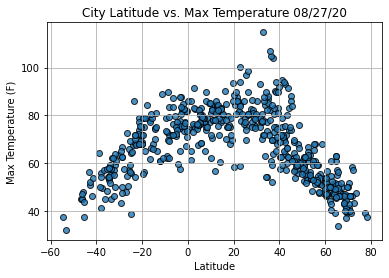

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

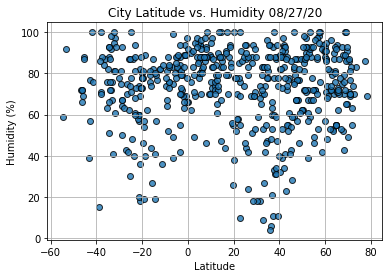

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

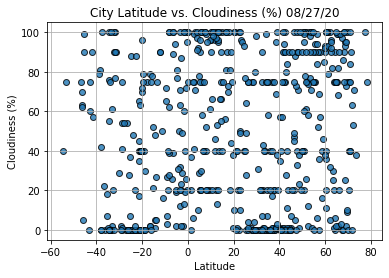

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

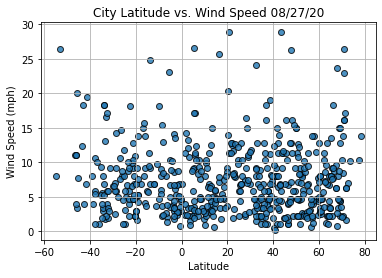

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
index13 = city_data_df.loc[13]
index13

City                   Nueva Loja
Lat                          0.08
Lng                        -76.88
Max Temp                       86
Humidity                       66
Cloudiness                     75
Wind Speed                   6.93
Country                        EC
Date          2020-08-27 22:55:36
Name: 13, dtype: object

In [31]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Upernavik,72.79,-56.15,43.16,70,71,7.00,GL,2020-08-27 22:55:35
1,Punta Arenas,-53.15,-70.92,32.00,92,75,26.40,CL,2020-08-27 22:55:35
2,Torbay,47.67,-52.73,59.00,67,40,12.75,CA,2020-08-27 22:55:35
3,Bredasdorp,-34.53,20.04,53.60,93,55,8.05,ZA,2020-08-27 22:55:35
4,San Carlos,9.66,-68.58,77.41,89,61,1.79,VE,2020-08-27 22:55:35


In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

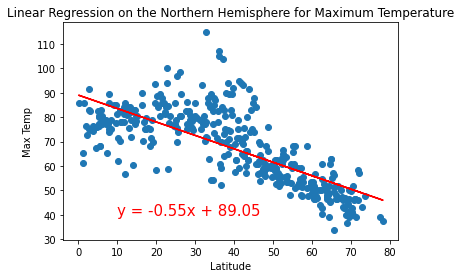

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, plt.title("Linear Regression on the Northern Hemisphere for Maximum Temperature"), "Max Temp",(10,40))

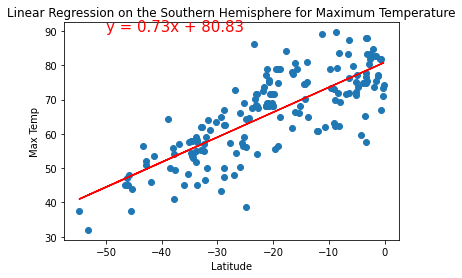

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, plt.title('Linear Regression on the Southern Hemisphere for Maximum Temperature'), 'Max Temp',(-50,90))

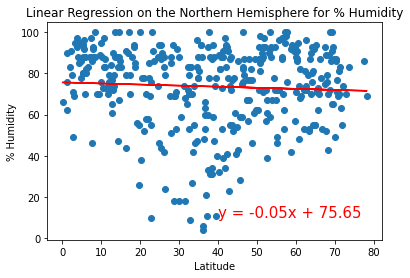

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       plt.title('Linear Regression on the Northern Hemisphere for % Humidity'), '% Humidity',(40,10))

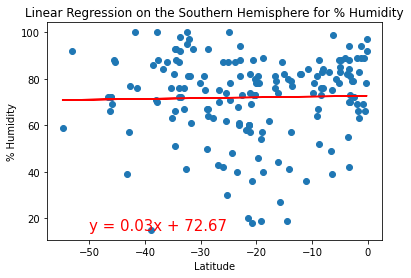

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       plt.title('Linear Regression on the Southern Hemisphere for % Humidity'), '% Humidity',(-50,15))

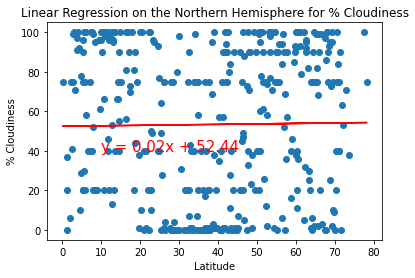

In [48]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       plt.title('Linear Regression on the Northern Hemisphere for % Cloudiness'), '% Cloudiness',(10,40))

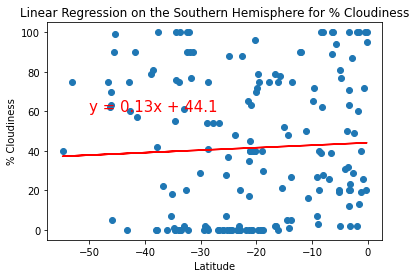

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       plt.title('Linear Regression on the Southern Hemisphere for % Cloudiness'), '% Cloudiness',(-50,60))

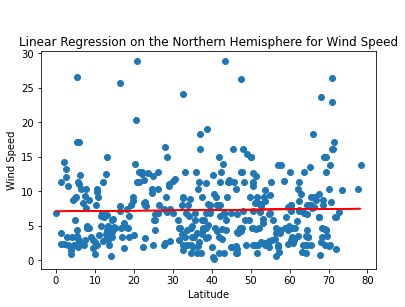

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       plt.title('Linear Regression on the Northern Hemisphere for Wind Speed'), 'Wind Speed',(40,35))

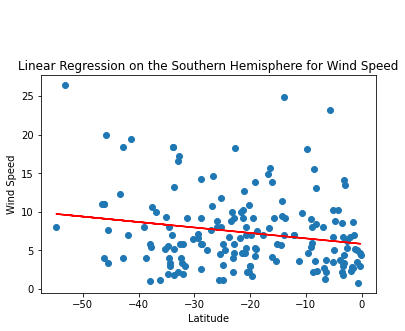

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       plt.title('Linear Regression on the Southern Hemisphere for Wind Speed'), 'Wind Speed',(-50,35))